Using the CIFAR10 Dataset from Kaggle for multiclass classification


In [34]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [15]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [16]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [18]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

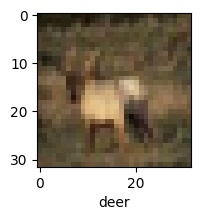

In [19]:
plot_sample(x_train, y_train, 3)

In [20]:
x_train = x_train/255
x_test = x_test/255

Trying to implement Artificial Neural Network before we get to CNN.

In [21]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation='softmax')
])
ann.compile(optimizer = 'SGD',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])
ann.fit(x_train, y_train, epochs = 5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3056 - loss: 1.9292
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4197 - loss: 1.6429
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4531 - loss: 1.5498
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4820 - loss: 1.4796
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4971 - loss: 1.4277


Now, let's try the same with cnn.

In [22]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
ann.compile(optimizer = 'SGD',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])
ann.fit(x_train, y_train, epochs = 5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5073 - loss: 1.4000
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5196 - loss: 1.3578
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5396 - loss: 1.3132
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5493 - loss: 1.2843
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5636 - loss: 1.2547


In [23]:
cnn.compile(optimizer = 'adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])
ann.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5733 - loss: 1.2173
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5832 - loss: 1.1870
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5928 - loss: 1.1613
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6066 - loss: 1.1372
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6131 - loss: 1.1031


In [24]:
cnn.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3841 - loss: 1.6824
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5899 - loss: 1.1679
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6390 - loss: 1.0343
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6669 - loss: 0.9624
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6893 - loss: 0.8932
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7086 - loss: 0.8415
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7211 - loss: 0.7952
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7327 - loss: 0.7648
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7440 - loss: 0.7346
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7593 - loss: 0.6904


In [25]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6963 - loss: 0.9093


[0.9135738015174866, 0.6919000148773193]

In [30]:
y_probab = cnn.predict(x_test)
y_classes = y_probab.argmax(axis=-1)
y_test = y_test.reshape(-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [31]:
print("Classification Report: \n")
print(classification_report(y_test, y_classes))

Classification Report: 

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      1000
           1       0.76      0.82      0.79      1000
           2       0.62      0.50      0.55      1000
           3       0.54      0.49      0.51      1000
           4       0.66      0.64      0.65      1000
           5       0.58      0.63      0.60      1000
           6       0.76      0.76      0.76      1000
           7       0.76      0.73      0.74      1000
           8       0.79      0.79      0.79      1000
           9       0.75      0.79      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



Text(158.22222222222223, 0.5, 'Truth')

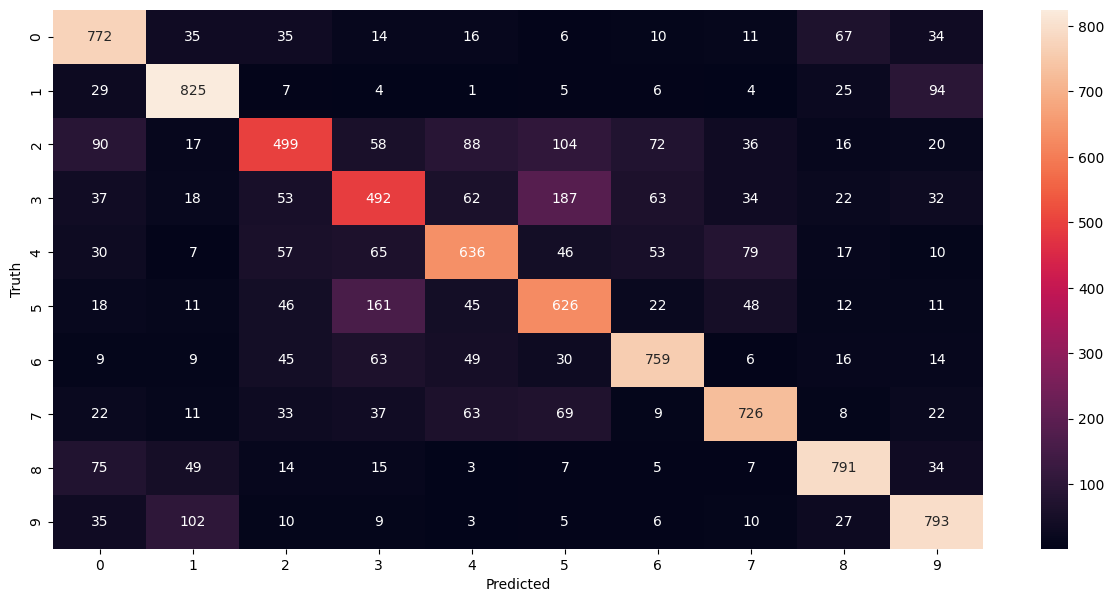

In [35]:
cm = confusion_matrix(y_test, y_classes)
plt.figure(figsize = (15,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')